In [1]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow as cv_imshow
# version check
cv.__version__

'3.4.3'

In [2]:
## Creating a function to download img from a url specified by the USER
import urllib.request as urlrequest

def dl_img(url, file_path, file_name):
  _path = file_path + file_name + '.jpg'
  urlrequest.urlretrieve(url, _path)
  
url = input("URL: ")
saveas = input("File Name: ")

dl_img(url, '/content/', saveas)

# https://cdn.shopify.com/s/files/1/1893/0477/products/5PCS_Framed_Colorful_Lion_Canvas_Prints_grande.png?v=1504331897
# https://www.artgalleryofhamilton.com/wp-content/uploads/2018/04/abstract-painting.jpg
# https://pythonprogramming.net/static/images/opencv/bookpage.jpg
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_piecharts_thumb.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter_001.png
# https://matplotlib.org/3.1.1/_images/sphx_glr_scatter3d_001.png
# https://www.mathworks.com/help/examples/matlabmobile/win64/Scatter3DPlotExample_01.png

URL: https://pythonprogramming.net/static/images/opencv/bookpage.jpg
File Name: abstract_book_page


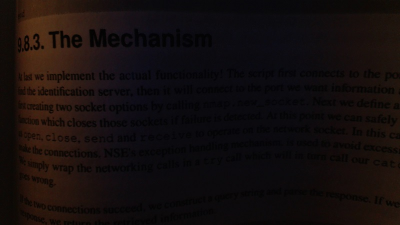

In [3]:
# load an img
img1 = cv.imread('abstract_book_page.jpg', 1)

# resizing imgs. to same size & display the img.
imgr1 = cv.resize(img1, None, None, 0.5, 0.5, interpolation = cv.INTER_AREA)

cv_imshow(imgr1)


* THRESHOLDING (WHY??)
> * Extreme Simplification of an image 
    * Colored --> Gray-scale --> 0(black) or 1(white) --> applying gradients
    * Gray-scale: loses the readability on application of threshold (based only on white or black depending upon the lighting)  
    
    
 * GAUSSIAN ADAPTIVE THRESHOLDING
 > * Thresholding based on the region where it is being applied
   * cv.adaptiveThreshold(gray_imgr1, maxValue, cv.ADAPTIVE_THRESH_GAUSSIAN_C(adaptiveMethod), cv.THRESH_BINARY(thresholdType), blockSize, C):
    * blockSize = size of the Gaussian window (sub-region size)
    * C = a constant subtracted from the threshold value for each sub-region

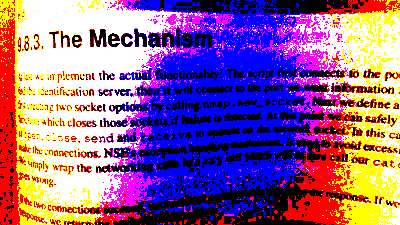

In [5]:
# thresholding
retval, threshold = cv.threshold(imgr1, 12, 255, cv.THRESH_BINARY)

# display
cv_imshow(threshold)

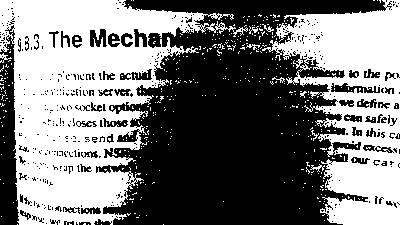

In [6]:
# convert to gray-scale & then applying threshold to it
gray_imgr1 = cv.cvtColor(imgr1, cv.COLOR_BGR2GRAY)
 
retval, threshold = cv.threshold(gray_imgr1, 12, 255, cv.THRESH_BINARY)

cv_imshow(threshold)

Help on built-in function adaptiveThreshold:

adaptiveThreshold(...)
    adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
    .   @brief Applies an adaptive threshold to an array.
    .   
    .   The function transforms a grayscale image to a binary image according to the formulae:
    .   -   **THRESH_BINARY**
    .   \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
    .   -   **THRESH_BINARY_INV**
    .   \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
    .   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
    .   
    .   The function can process the image in-place.
    .   
    .   @param src Source 8-bit single-channel image.
    .   @param dst Destination image of the same size and the same type as src.
    .   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
    .   @p

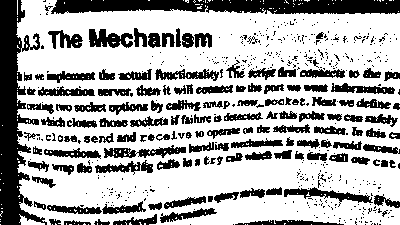

In [11]:
# convert to gray-scale & then applying threshold to it
gray_imgr1 = cv.cvtColor(imgr1, cv.COLOR_BGR2GRAY)
 
help(cv.adaptiveThreshold)

gaussian_threshold = cv.adaptiveThreshold(gray_imgr1, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 115, 1)

cv_imshow(gaussian_threshold)